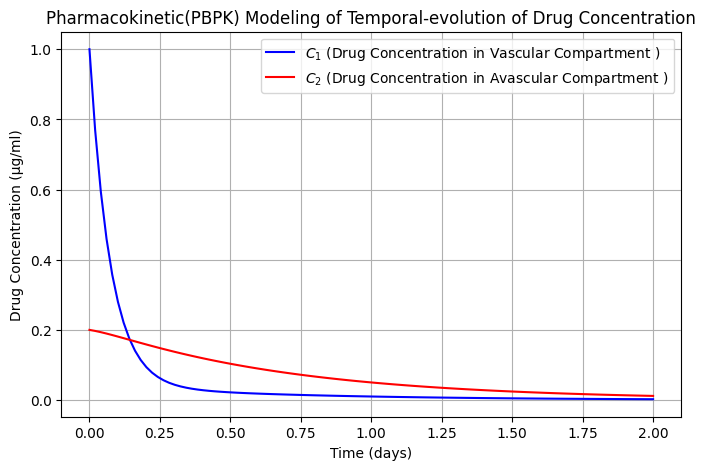

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline
# Define parameter values
k21 = 1.48  # day^-1
k12 = 0.276  # day^-1
k10 = 13.27  # day^-1
V1 = 4.85e3  # ml
V2 = 8.0e3  # ml

# Initial conditions at t = 0
C1_0 = 1.0  # μg/ml
C2_0 = 0.2  # μg/ml

# Define the system of ODEs
def two_compartment(t, C):
    C1, C2 = C
    dC1dt = k21 * (V2/V1) * C2 - (k12 + k10) * C1
    dC2dt = k12 * (V1/V2) * C1 - k21 * C2
    return [dC1dt, dC2dt]

# Time range (0 to 2 days)
t_span = (0, 2)
t_eval = np.linspace(0, 2, 100)  # 100 points for smooth curve

# Solve the ODEs
solution = solve_ivp(two_compartment, t_span, [C1_0, C2_0], t_eval=t_eval)

# Extract time and concentrations
t = solution.t
C1 = solution.y[0]
C2 = solution.y[1]

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(t, C1, label=r'$C_1$ (Drug Concentration in Vascular Compartment )', color='b')
plt.plot(t, C2, label=r'$C_2$ (Drug Concentration in Avascular Compartment )', color='r')
plt.xlabel('Time (days)')
plt.ylabel('Drug Concentration (μg/ml)')
plt.title('Pharmacokinetic(PBPK) Modeling of Temporal-evolution of Drug Concentration')
plt.legend()
plt.grid(True)
plt.show()
